Voici un exemple de programme complet sinusoides.py permettant de comparer deux sinusoïdes et modifier leur paramètres comme l'amplitude, la période ou encore le déphasage.

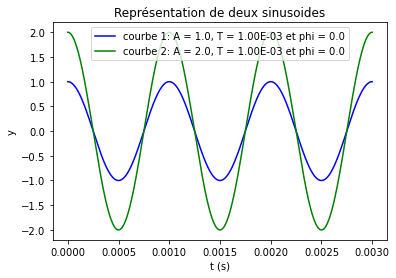

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import cos, pi

# Pour la première sinusoïde
A1 = 1.
T1 = 0.001
phi1 = 0.

# Pour la seconde sinusoïde
A2 = 2.
T2 = 0.001
phi2 = 0.

t = [ ]
Y1 = [ ]
Y2 = [ ]
dt = max(T1,T2)/10000 #10000 points par période

for i in range(30000): #on crée les listes de données -au moins 3 périodes-
    t.append(i * dt)
    Y1.append(A1 * cos(2 * pi * t[-1] / T1 + phi1))
    Y2.append(A2 * cos(2 * pi * t[-1] / T2 + phi2))

plt.plot(t,Y1,"blue",label="courbe 1: A = {}, T = {:.2E} et phi = {}".format(A1,T1,phi1)) #on trace les deux courbes
plt.plot(t,Y2,"green",label="courbe 2: A = {}, T = {:.2E} et phi = {}".format(A2,T2,phi2))

plt.xlabel("t (s)") #Ajoute une légende sur chaque axe
plt.ylabel("y")
plt.legend() #affiche la légende du graphique
plt.title("Représentation de deux sinusoides") #ajoute un titre à la figure

plt.show() #affiche le graphique

On peut aussi visualiser la somme de ces deux sinusoïdes (en fixant une fréquence commune) avec une modification minimale de ce code

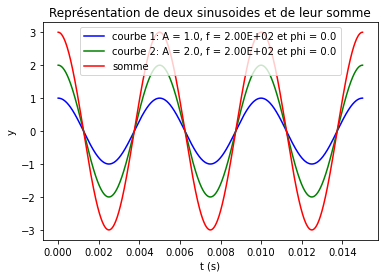

In [13]:
import matplotlib.pyplot as plt
from math import cos, pi

# Pour la première sinusoïde
A1 = 1.
phi1 = 0.

# Pour la seconde sinusoïde
A2 = 2.
phi2 = 0.

# propriétés communes
f = 200. # fréquence

t = [ ]
Y1 = [ ]
Y2 = [ ]
Y3 = [ ] # pour la somme
dt = 1/(10000*f)

for i in range(30000): 
    t.append(i * dt)
    Y1.append(A1 * cos(2 * pi * f * t[-1] + phi1))
    Y2.append(A2 * cos(2 * pi * f * t[-1] + phi2))
    Y3.append(Y1[-1] + Y2[-1]) # pour la somme

plt.plot(t,Y1,"blue",label="courbe 1: A = {}, f = {:.2E} et phi = {}".format(A1,f,phi1)) 
plt.plot(t,Y2,"green",label="courbe 2: A = {}, f = {:.2E} et phi = {}".format(A2,f,phi2))
plt.plot(t,Y3,"red", label="somme")
plt.xlabel("t (s)") 
plt.ylabel("y")
plt.legend()
plt.title("Représentation de deux sinusoides et de leur somme") 

plt.show()

In [15]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Pour aller plus loin, on peut voir quelques spécificités des notebooks Jupyter (inutile de tester ça avec un autre IDE il y a de fortes chances que ça ne fonctionnne pas): la possibilité de créer très facilement des interfaces graphiques grâce à **interact**.

In [7]:
import matplotlib.pyplot as plt
from math import pi, cos
from ipywidgets import interact, interactive

@interact(a1=(0.5,5.,0.5),phi1=(-pi,pi,pi/4),f1=(200,1000,200),a2=(0.5,5.,0.5),phi2=(-pi,pi, pi/4),f2=(200,1000,200))
def affiche(a1=2., phi1=0., f1=200, a2=1.0, phi2=0., f2=200):
    t = [0.00005*i for i in range(400)]
    y1=[a1*cos(2*pi*f1*val + phi1) for val in t] 
    y2 =[a2*cos(2*pi*f2*val + phi2) for val in t]

    plt.plot(t,y1,"blue",label="courbe 1: A = {:.1f}, f = {:.2E} et phi = {:.2}".format(a1,f1,phi1)) 
    plt.plot(t,y2,"green",label="courbe 2: A = {:.1f}, f = {:.2E} et phi = {:.2}".format(a2,f2,phi2))

    plt.xlim([0,0.02])
    plt.ylim([-10,10])
    plt.legend()
    plt.show()


interactive(children=(FloatSlider(value=2.0, description='a1', max=5.0, min=0.5, step=0.5), FloatSlider(value=…

In [10]:
import matplotlib.pyplot as plt
from math import pi, cos
from ipywidgets import interact, interactive

@interact(a1=(0.5,5.,0.5),phi1=(-pi,pi,pi/16),a2=(0.5,5.,0.5),phi2=(-pi,pi, pi/8),f=(100,1000,100))
def affiche(a1=2., phi1=0., a2=2.0, phi2=pi/4, f=200):
    x = [0.00005*i for i in range(400)]
    y1=[a1*cos(2*pi*f*val + phi1) for val in x] 
    y2 =[a2*cos(2*pi*f*val + phi2) for val in x]
    y3 =[y1[i] +y2[i] for i in range(400)]
    plt.plot(x,y1,"g", label='cos1' )
    plt.plot(x,y2,"b", label='cos2' )
    plt.plot(x,y3,"r", label='somme' )
    plt.xlim([0,0.02])
    plt.ylim([-10,10])
    plt.legend()
    plt.show()



interactive(children=(FloatSlider(value=2.0, description='a1', max=5.0, min=0.5, step=0.5), FloatSlider(value=…